 # Familiarizandonos con Jupyter Notebook

## MARKDOWN SINTAXIS



# Esto es un título 

## Esto es un sub-título
....
###### Y esto es un sub^6- título

### ENFÁSIS

*This text will be italic* 

_This will also be italic_

**This text will be bold**

__This will also be bold__

*You **can** combine them*

## LISTA NO NUMERADA

* Item 1
* Item 2

    * Item 2a 
    * Item 2b

## LISTA NUMERADA

1. Item 1 
2. Item 2 
3. Item 3
   * Item 3a 
   * Item 3b

## INSERTAR IMAGENES

Simplemente especificando el path

![Presentación](Material/img1.png "Presentación")


pero si la queremos modificar, y adaptar podemos usar codigo en python....


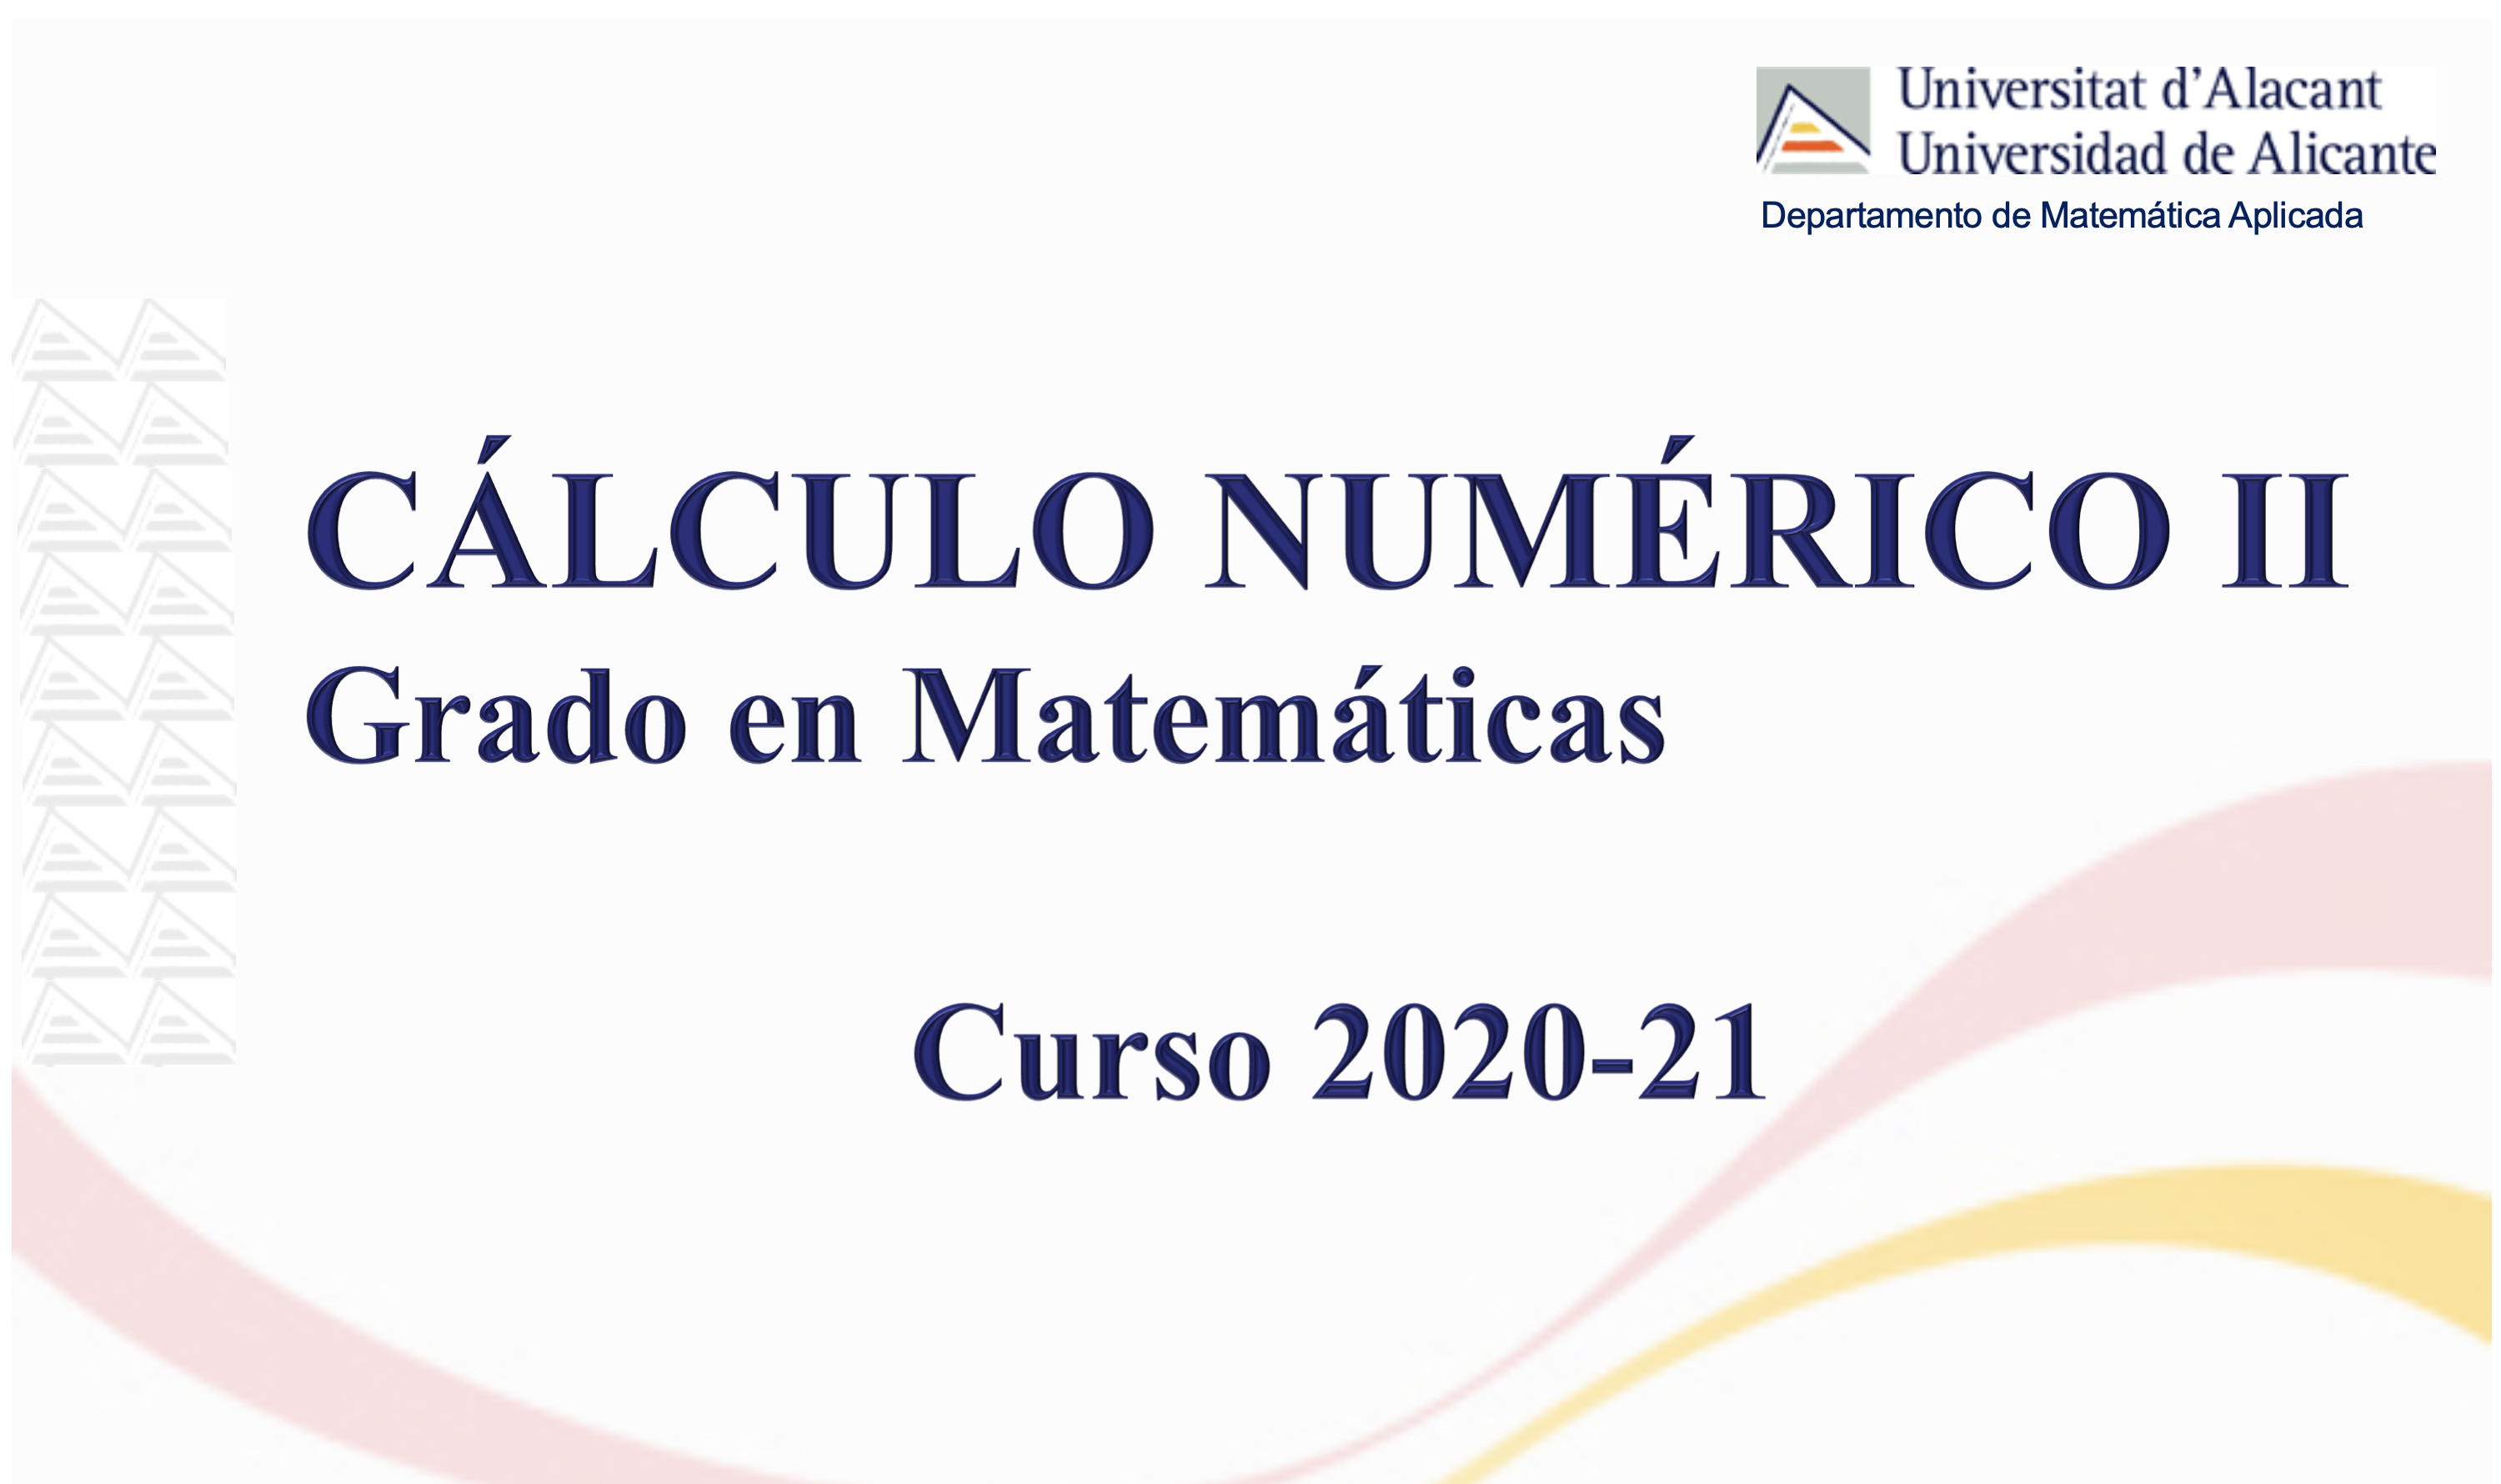

In [21]:
from IPython.display import Image 
Image(filename="Material/img1.png", width=500,height=350)


## INSERTAR ENLACES

Podemos insertar enlaces dejando la url visible
https://jupyter-notebook.readthedocs.io/en/stable/index.html 
ó bien enlazar la url a texto
[Jupyter Documetation](https://jupyter-notebook.readthedocs.io/en/stable/index.html)

## TABLAS

| Esto | es   |
|------|------|
|   una  | tabla|

Otra tabla 


First Header | Second Header 
------------ | ------------- 
Content cell 1 | Content cell 2 
Content column 1 | Content column 2





# Insert line numbers
shift + l alterna la visibilidad del número de línea.




# Práctica 0. Algoritmo de Horner

 
**Ejercicio 1.**   Construir un procedimiento HORNER que use el algoritmo de Horner para el cálculo eficiente del valor de un polinomio
$$
p(x)=a_0x^n+a_1x^{n-1}+…+a_{n-1}x+a_n
$$
en $x=x_0$.   

* Parámetros de entrada: 

     L: la lista de coeficientes del polinomio dada en la forma $[a_0,a_1,…,a_{n-1},a_n]$.
     
     $x_0$: el punto donde se quiere evaluar el polinomio. 
     
     
* Salida: $z$: el valor del polinomio en el punto $p(x_0)$.


**Algoritmo**

Lo primero es tener claro que ha de hacer nuestro programa, la justificación la teneis en las notas de teoría (pags. 13 y 14 del Tema 0). 


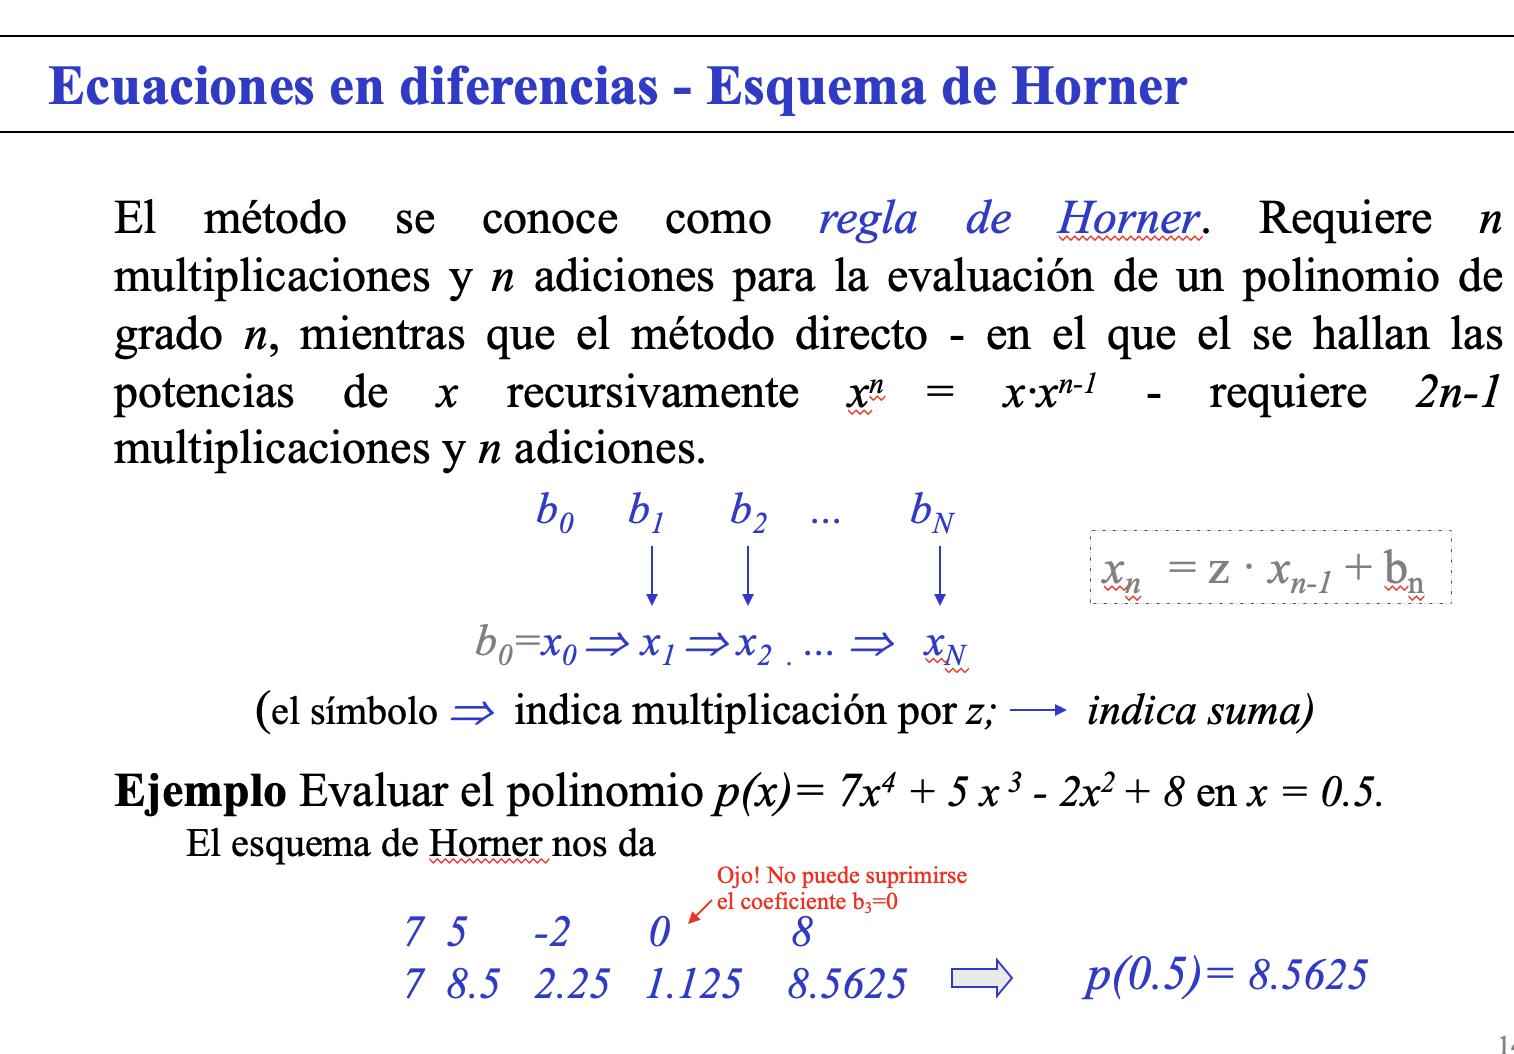

In [1]:
from IPython.display import Image 
Image(filename="Material/horner.png", width=550,height=500)


### Pseudocódigo del algoritmo: 
 
>Input: L=[ai, i=0..n], x0 
>
>z= L[0]
>
>for k = 1..n do
>>
>>z=z*x0+L[k]
>>
>end do
>
>output z
>
>Fin


In [1]:
def HORNER(L,x0):
    x1 = L[0]
    v = [x1]
    if len(L) >= 2:
        x2 = x1*x0+L[1]
        v.append(x2)
        for i in range(2,len(L)):
            x2 = x0*v[i-1]+L[i]
            v.append(x2)
    return x2


Otra implementación del algoritmo de Horner más condensada.

In [2]:
def HORNER_v2(L,x0):
    x2 = [0]*(len(L)+1)
    for kk in range(0,len(L)):
       x2[kk+1] = x2[kk]*x0+L[kk]
    return x2[-1]

Comprobamos si funcionan y el resultado es el mismo, para ello evaluemos el polinomio $p(x)= 5x^3 + 4x^2 +3x +2$ en $x=3$, cuyo valor es $p(3) = 182$.

In [3]:
HORNER([5,4,3,2],3)


182

In [4]:
HORNER_v2([5,4,3,2],3)

182

In [5]:
HORNER([7,5,-2,0,8],.5)

8.5625

In [6]:
HORNER_v2([7,5,-2,0,8],.5)

8.5625

**Comparación de los tiempos de cálculo**

Una manera sencilla de estudiar que código es más eficiente, aunque no la única (por ejemplo, también es importante analizar la gestión de la memoria), es calcular el tiempo que los programas emplean en realizar una cierta tarea. Para ello ultizaremos la librería  *time*. Ahora vamos a comparar el tiempo que tardan los códigos *HORNER* y *HORNER_v2* en evaluar el polinomio $5x³+4x²+3x+2$ para una serie de puntos dados.

In [2]:
import time 
import numpy as np


x = np.arange(-10,10.5,0.5)  # Valores x0 donde se va a evaluar el polinomio L
L = [5,4,3,2]
  
t1 = []
for kk in range(0,len(x)):
    time_start = time.perf_counter()
    HORNER(L,x[kk])
    t1.append(time.perf_counter() - time_start)
    


t2 = []
for kk in range(0,len(x)):
    time_start = time.perf_counter()
    HORNER_v2(L,x[kk])
    t2.append(time.perf_counter() - time_start)
    
    
print('Tiempo medio empleado por la función HORNER: ' + '{:1.2g}'.format(np.nanmean(t1)) + ' seconds')

print('Tiempo medio empleado por la función HORNER_v2: ' + '{:1.2g}'.format(np.nanmean(t2)) + ' seconds')


NameError: name 'HORNER' is not defined

Si ahora queremos mostrar los tiempos obtenidos para cada programa en forma de tabla, se puede usar la función *Dataframe* de la librería *pandas*

In [9]:
import pandas
data = {'t1 (ms)':t1*1000,'t2 (ms)':t2*1000}  ## diccionario donde se definen las variables y sus etiquetas. 
##Notad que hemos pasado se segundos a milisegundos
pandas.DataFrame(data)


,t1 (ms),t2 (ms)
0,0.000038,0.000015
1,0.000008,0.000008
2,0.000007,0.000008
3,0.000006,0.000008
4,0.000006,0.000008
...,...,...
40995,0.000006,0.000007
40996,0.000006,0.000007
40997,0.000006,0.000007
40998,0.000006,0.000007


Si tan sólo queremos mostrar las primera *n* filas, por ejemplo $n=10$, se puede indicar de la siguiente manera:

In [12]:
DATA = pandas.DataFrame(data)
DATA.head(10)

,t1 (ms),t2 (ms)
0,0.000019,0.000010
1,0.000006,0.000004
2,0.000006,0.000004
3,0.000005,0.000004
4,0.000006,0.000004
5,0.000005,0.000004
6,0.000005,0.000004
7,0.000005,0.000004
8,0.000005,0.000004
9,0.000005,0.000004


In [15]:
DATA.loc[0:9:2,:]


,t1 (ms),t2 (ms)
0,0.000019,0.000010
2,0.000006,0.000004
4,0.000006,0.000004
6,0.000005,0.000004
8,0.000005,0.000004


**Ejercicio 2**. Modificar el programa *HORNER*, mostrado anteriormente, para que permita introducir las entradas en comando de línea.

In [8]:
def HORNER():
    
    n = int(input("Introduce el grado del polinomio : ")) +1
    L = list(map(float,input("Introduce los coeficientes: ").strip().split()))[:n]
    x0=float(input("Intruce el x_0 donde quieres evaluar el polinomio "))
    x1 = L[0]
    v = [x1]
    if len(L) >= 2:
        x2 = x1*x0+L[1]
        v.append(x2)
        for i in range(2,len(L)):
            x2 = x0*v[i-1]+L[i]
            v.append(x2)
    return x2

In [10]:
HORNER()

Introduce el grado del polinomio : 4
Introduce los coeficientes: 7 5 -2 0 8
Intruce el x_0 donde quieres evaluar el polinomio 0.5


8.5625

# Terminamos con alguna representación gráfica

Terminamos esta sesión viendo como hacer una gráfica sencilla, por ejemplo representar unos cuantos puntos en el plano:

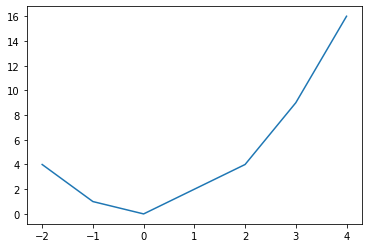

In [19]:
import matplotlib.pyplot as plt

X=[-2, -1, 0, 2, 3,4]
Y=[4, 1, 0, 4, 9, 16]
plt.plot(X,Y)
plt.show()


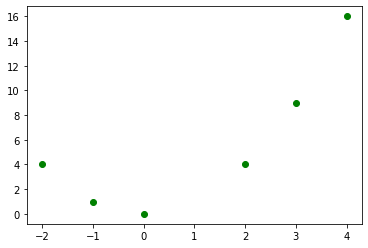

In [20]:
plt.scatter(X, Y, c='g')
plt.show()

Tambien podemos superponer varios plots en una misma gráfica

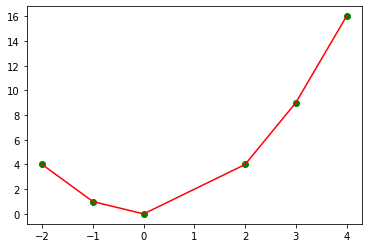

In [21]:
plt.plot(X,Y, c='r')
plt.scatter(X, Y, c='g')
plt.show()

Calculemos ahora el  **polinomio interpolador de Lagrange**, y hagamos su representación gráfica. Para ello necesitamos programar las siguientes funciones (Phython permite la *programación orientada a objetos*) 

In [10]:
import numpy as np
import matplotlib.pyplot as plt


class LagrangePoly:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        b = [(x - self.X[m]) / (self.X[j] - self.X[m])
             for m in range(self.n) if m != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)


Dadas dos listas de puntos, representamos estos en el plano, y su polinomio interpolador junto con los polinómios básicos de Lagrange. 

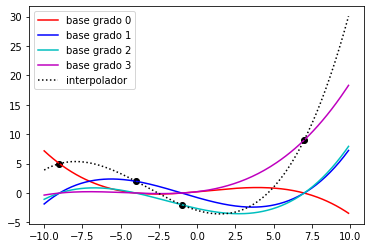

In [17]:
X  = [-9, -4, -1, 7]
Y  = [5, 2, -2, 9]

plt.scatter(X, Y, c='k')

lp = LagrangePoly(X, Y)

xx = np.arange(-100, 100) / 10

plt.plot(xx, lp.basis(xx, 0),c='r',label='base grado 0')
plt.plot(xx, lp.basis(xx, 1),c='b',label='base grado 1')
plt.plot(xx, lp.basis(xx, 2),c='c',label='base grado 2')
plt.plot(xx, lp.basis(xx, 3),c='m',label='base grado 3')
plt.plot(xx, lp.interpolate(xx), linestyle=':',c='k',label='interpolador')
plt.legend()
plt.show()

Por último, si cada curva la queremos mostrar en paneles separados podemos emplear la función *subplot* de *matplotlib*.

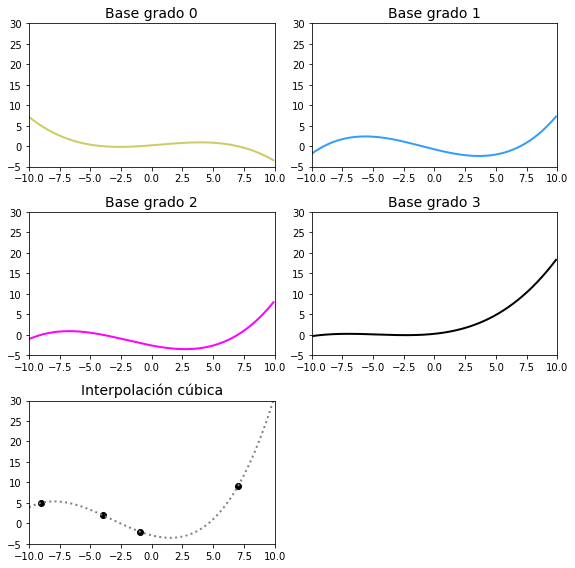

In [24]:
fig = plt.figure(figsize=(8,8))
plt.subplot(321)
plt.plot(xx, lp.basis(xx, 0),linestyle='-',linewidth=2,color=(0.8,0.8,0.4))  ## color en formato (r,g,b) normalizado
plt.title('Base grado 0',fontsize=14)
plt.xlim(-10,10)
plt.ylim(-5,30)

plt.subplot(322)
plt.plot(xx, lp.basis(xx, 1),linestyle='-',linewidth=2,color="#339cff")   ## color en formato hexadecimal
plt.title('Base grado 1',fontsize=14)
plt.xlim(-10,10)
plt.ylim(-5,30)

plt.subplot(323)
plt.plot(xx, lp.basis(xx, 2),linestyle='-',linewidth=2,color='magenta')   ## color usando etiquetas reservadas de python
plt.title('Base grado 2',fontsize=14)
plt.xlim(-10,10)
plt.ylim(-5,30)

plt.subplot(324)
plt.plot(xx, lp.basis(xx, 3),linestyle='-',linewidth=2,color='k')
plt.title('Base grado 3',fontsize=14)
plt.xlim(-10,10)
plt.ylim(-5,30)

plt.subplot(325)
plt.plot(xx, lp.interpolate(xx), linestyle=':',linewidth=2,color='gray')
plt.scatter(X, Y, c='k')
plt.title('Interpolación cúbica',fontsize=14)
plt.xlim(-10,10)
plt.ylim(-5,30)

fig.tight_layout()   ## Para ajustar espacio entre paneles de manera que los títulos no se superpongan
     
plt.show()    

# Ejercicio propuesto


Calcula la integral numérica de una función *f(x)* sobre un intervalo *[a,b]* utilizando la regla de Simpson y representar gráficamente la función y area que representa la integral.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f

def f(x):
    return np.sin(x)**2

# Definimos el intervalo

a = 0
b = np.pi

# Definimos el polinomio interpolador de orden 2

def P(x):
    m = (a+b)/2
    return f(a)*((x-m)*(x-b))/((a-m)*(a-b))+f(m)*((x-a)*(x-b))/((m-a)*(m-b))+f(b)*((x-a)*(x-m))/((b-a)*(b-m))

# Definimos la función para la regla de Simpson

def SIMPSON(f,a,b):
    return (b-a)*(f(a)+4*f((a+b)/2)+f(b))/6

# Aplicamos Simpson a f

SIMPSON(f,a,b)

2.0943951023931953

Text(0.5, 1.0, 'Representación regla de Simpson')

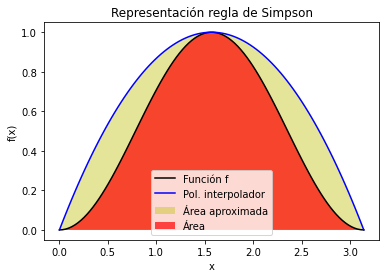

In [56]:
# Representación gráfica

X = np.linspace(a,b,100)

plt.plot(X,f(X),'k',X,P(X),'b')
plt.fill_between(X, 0, P(X), facecolor='y', alpha = 0.4)
plt.fill_between(X, 0, f(X), facecolor='r', alpha = 0.7)

plt.legend(["Función f","Pol. interpolador","Área aproximada","Área"],loc="best")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Representación regla de Simpson")